<a href="https://colab.research.google.com/github/Narenderreddyranabothu/DataScience-Project/blob/main/P_and_O_of_smart_grids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload()

Saving household_power_consumption.txt to household_power_consumption.txt


In [2]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Importing necessary libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For prettier graphs
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import RandomForestRegressor  # For building a prediction model
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluating the model
from datetime import datetime  # For handling dates
from sklearn.preprocessing import StandardScaler  # For scaling data
import statsmodels.api as sm  # For statistical analysis (optional)


In [6]:
# Read the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Display the first few rows
print("Initial DataFrame:")
print(df.head())

# Check the shape and data types
print("Shape of the DataFrame:", df.shape)
print("Data types of each column:")
print(df.dtypes)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


Initial DataFrame:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
Shape of the DataFrame: (2075259, 9)
Data types of each column:
Date                      object
Time         

In [7]:
# Convert 'Date' and 'Time' columns to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Handle missing values by filling them with the column's median
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coercing errors to NaN
df.fillna(df.median(), inplace=True)

# Display the cleaned data
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,1166289840000000000
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,1166289900000000000
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,1166289960000000000
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,1166290020000000000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,1166290080000000000


In [8]:
# Sample DataFrame for demonstration
# df = pd.DataFrame({'Global_active_power': ['1.0', '2.5', '3.3', '4.1', 'NaN', '5.0', 'invalid']})

# Convert the 'Global_active_power' column to float
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Print the 'Global_active_power' columnb
print(df['Global_active_power'])

0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
2075254    0.946
2075255    0.944
2075256    0.938
2075257    0.934
2075258    0.932
Name: Global_active_power, Length: 2049280, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


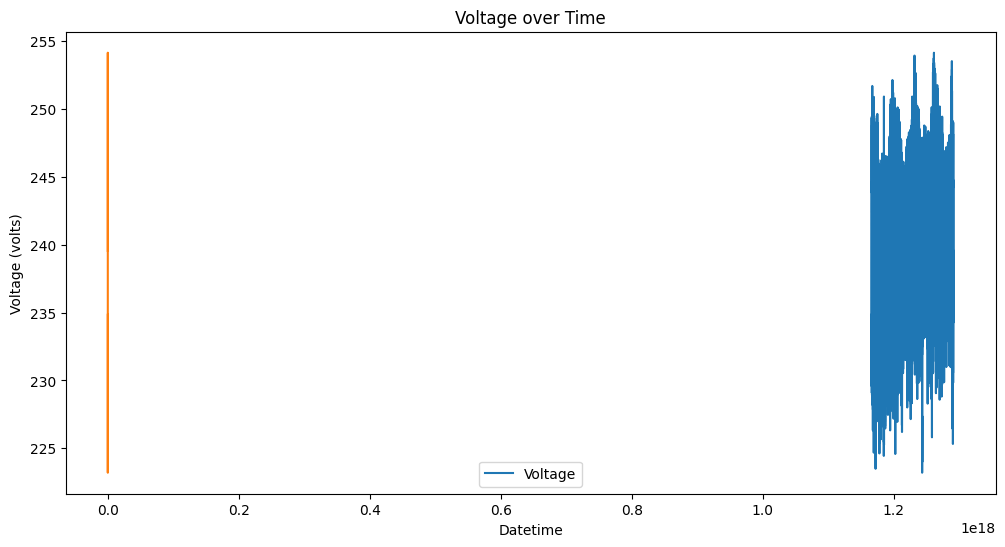

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Voltage'], label='Voltage')
plt.plot(df['Voltage'].values)
plt.title('Voltage over Time')
plt.xlabel('Datetime')
plt.ylabel('Voltage (volts)')
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['Hour', 'Day', 'Month', 'Global_active_power_lag1', 'Global_active_power_lag24']]
y = df['Global_active_power']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "None of [Index(['Hour', 'Day', 'Month', 'Global_active_power_lag1',\n       'Global_active_power_lag24'],\n      dtype='object')] are in the [columns]"

In [ ]:
print(df.columns)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Hour', 'Day', 'Month'],
      dtype='object')


In [ ]:
# Create lag features
df['Global_active_power_lag1'] = df['Global_active_power'].shift(1)
df['Global_active_power_lag24'] = df['Global_active_power'].shift(24)

# Optionally, drop rows with missing values due to the shift
df = df.dropna(subset=['Global_active_power_lag1', 'Global_active_power_lag24'])


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['Hour', 'Day', 'Month', 'Global_active_power_lag1', 'Global_active_power_lag24']]
y = df['Global_active_power']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)